# Python RegEx

In this Notbook, you will learn about regular expressions (RegEx), and use Python's re module to work with RegEx (with the help of examples).

A **Reg**ular **Ex**pression (RegEx) is a sequence of characters that defines a search pattern. For example,

```python
>>> ^a...s$
```

The above code defines a RegEx pattern. The pattern is: **any five letter string starting with `a` and ending with `s`**.

A pattern defined using RegEx can be used to match against a string.

| Expression | String | Matched? |
|:----| :--- |:--- |
|               |  **`abs`** | No match |
|               |  **`alias`** | Match |
| **`^a...s$`** |  **`abyss`** | Match |
|               |  **`Alias`** | No match |
|               |  **`An abacus`** | No match |

Python has a module named **`re`** to work with RegEx. Here's an example:

In [5]:
import re

pattern = '^a...s$'
test_string = 'abyss'
result = re.match(pattern, test_string)

if result:
    print("Search successful.")
else:
    print("Search unsuccessful!")

Search successful.


Here, we used **`re.match()`** function to search **`pattern`** within the **`test_string`**. The method returns a match object if the search is successful. If not, it returns **`None`**.

There are other several functions defined in the **`re`** module to work with RegEx. Before we explore that, let's learn about regular expressions themselves.

## Specify Pattern Using RegEx

To specify regular expressions, metacharacters are used. In the above example, **`^`** and **`$`** are metacharacters.

## MetaCharacters

Metacharacters are characters that are interpreted in a special way by a RegEx engine. Here's a list of metacharacters:

###  **`[] . ^ $ * + ? {} () \ |`**

### 1. `[]` - Square brackets

Square brackets specifies a set of characters you wish to match.

| Expression | String | Matched? |
|:----| :--- |:--- |
|             |  **`a`** | 1 match |
|             |  **`ac`** | 2 matches |
| **`[abc]`** |  **`Hey Jude`** | No match |
|             |  **`abc de ca`** | 5 matches |

Here, **`[abc]`** will match if the string you are trying to match contains any of the **`a`**, **`b`** or **`c`**.

You can also specify a range of characters using **`-`** inside square brackets.

* **`[a-c]`** means, a or b or c
* **`[a-z]`** means, any letter from a to z
* **`[A-Z]`** means, any character from A to Z
* **`[0-3]`** means, 0 or 1 or 2 or 3
* **`[0-9]`** means any number from 0 to 9
* **`[A-Za-z0-9]`** any single character, that is a to z, A to Z or 0 to 9

You can complement (invert) the character set by using caret **`^`** symbol at the start of a square-bracket.

* **`[^abc]`** means any character except **`a`** or **`b`** or **`c`**.
* **`[^0-9]`** means any non-digit character.

### 2. `.` - Period

A period matches any single character (except newline **`'\n'`**).

| Expression | String | Matched? |
|:----| :--- |:--- |
|          |  **`a`** | No match |
|          |  **`ac`** | 1 match |
| **`..`** |  **`acd`** | 1 match |
|          |  **`acde`** | 2 matches (contains 4 characters) |

### 3. `^` - Caret

The caret symbol **`^`** is used to check if a string **starts with** a certain character.

  * **`r'^substring'`** eg **`r'^love'`**, a sentence that starts with a word love
  * **`r'[^abc]`** means not a, not b, not c.

| Expression | String | Matched? |
|:----| :--- |:--- |
|          |  **`a`** | 1 match |
| **`^a`** |  **`abc`** | 1 match |
|          |  **`bac`** | No match |
|----------|------------|------------------------------------------------------------|
| **`^a`** |  **`abc`** | 1 match |
|          |  **`acd`** | No match (starts with **`a`** but not followed by **`b`**) |

### 4. `$` - Dollar

The dollar symbol **`$`** is used to check if a string **ends with** a certain character.

| Expression | String | Matched? |
|:----| :--- |:--- |
|          |  **`a`** | 1 match |
| **`a$`** |  **`formula`** | 1 match |
|          |  **`cab`** | No result |

### 5. `*` - Star

The star symbol **`*`** matches **zero or more occurrences** of the pattern left to it.

| Expression | String | Matched? |
|:----| :--- |:--- |
|            |  **`mn`** | 1 match |
|            |  **`man`** | 1 match |
| **`ma*n`** |  **`maaan`** | 1 match |
|            |  **`main`** | No match (**`a`** is not followed by **`n`**) |
|            |  **`woman`** | 1 match |

### 6. `+` - Plus

The plus symbol **`+`** matches **zero or more occurrences** of the pattern left to it.

| Expression | String | Matched? |
|:----| :--- |:--- |
|            |  **`mn`** | No match (no **`a`** character) |
|            |  **`man`** | 1 match |
| **`ma+n`** |  **`maaan`** | 1 match |
|            |  **`main`** | No match (**`a`** is not followed by **`n`**) |
|            |  **`woman`** | 1 match |

### 7. `?` - Question Mark

The question mark symbol **`?`** matches **zero or more occurrences** of the pattern left to it.

| Expression | String | Matched? |
|:----| :--- |:--- |
|            |  **`mn`** | 1 match |
|            |  **`man`** | 1 match |
| **`ma?n`** |  **`maaan`** | No match (more than one **`a`** character) |
|            |  **`main`** | No match (**`a`** is not followed by **`n`**) |
|            |  **`woman`** | 1 match |

### 8. `{}` - Braces

We can specify the length of the substring we are looking for in a text, using a curly brackets **`{}`**.

Consider this code: **`{n,m}`**. This means at least **`n`**, and at most **`m`** repetitions of the pattern left to it.

* **`{3}`**: Exactly 3 characters
* **`{3,}`**: At least 3 characters
* **`{3,8}`**: 3 to 8 characters

| Expression | String | Matched? |
|:----| :--- |:--- |
|              |  **`abc dat`** | No match |
|              |  **`abc daat`** | 1 match (at **`daat`**) |
| **`a{2,3}`** |  **`aabc daaat`** | 2 matches (at **`aabc`** and **`daaat`**) |
|              |  **`aabc daaaat`** | 2 matches (at **`aabc`** and **`daaaat`**) |

Let's try one more example. This RegEx **`[0-9]{2, 4}`** matches at least 2 digits but not more than 4 digits

| Expression | String | Matched? |
|:----| :--- |:--- |
|                  |  **`ab123csde`** | 1 match (match at **`ab123csde`**) |
| **`[0-9]{2,4}`** |  **`12 and 345673`** | 3 matches (**`12`**, **`3456`**, **`73`**) |
|                  |  **`1 and 2`** | No match |

### 9. `|` - Alternation

Vertical bar **`|`** is used for alternation (**`or`** operator).

| Expression | String | Matched? |
|:----| :--- |:--- |
|           |  **`cde`** | No match |
| **`a\|b`** |  **`ade`** | 1 match (match at **`ade`**) |
|           |  **`acdbea`** | 3 matches (at **`acdbea`**) |

Here, **`a|b`** match any string that contains either **`a`** or **`b`**

### 10. `()` - Group

Parentheses **`()`** is used to group sub-patterns. For example, **`(a|b|c)xz`** match any string that matches either **`a`** or **`b`** or **`c`**. followed by **`xz`**.

| Expression | String | Matched? |
|:----| :--- |:--- |
|                 |  **`ab xz`** | No match |
| **`(a\|b\|c)xz`** |  **`abxz`** | 1 match (match at **`abxz`**) |
|                 |  **`axz cabxz`** | 2 matches (at **`axz cabxz`**) |

### 11. `\` - Backslash

Backlash **`\`** is used to escape various characters including all metacharacters. For example,

**`\$a`** match if a string contains **`$`** followed by **`a`**. Here, **`$`** is not interpreted by a RegEx engine in a special way.

If you are unsure if a character has special meaning or not, you can put **`\`** in front of it. This makes sure the character is not treated in a special way.

### Special Sequences

Special sequences make commonly used patterns easier to write. Here's a list of special sequences:

#### `\A` - Matches if the specified characters are at the start of a string.

| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\Athe`** |  **`the sun`** | Match |
|             |  **`In the sun`** | No match |

#### `\b` - Matches if the specified characters are at the beginning or end of a word.

| Expression | String | Matched? |
|:----| :--- |:--- |
|             |  **`football`** | Match |
| **`\bfoo`** |  **`a football`** | Match |
|             |  **`afootball`** | No match |
|-------------|------------|-----------|
| **`foo\b`** |  **`the foo`** | Match |
|             |  **`the afoo test`** | Match |
|             |  **`the afootest`** | No match |

#### `\B` - Opposite of `\b`. Matches if the specified characters are not at the beginning or end of a word.

| Expression | String | Matched? |
|:----| :--- |:--- |
|             |  **`football`** | No match |
| **`\Bfoo`** |  **`a football`** | No match |
|             |  **`afootball`** | Match |
|-------------|------------|-----------|
| **`foo\B`** |  **`the foo`** | No match |
|             |  **`the afoo test`** | No match |
|             |  **`the afootest`** | Match |

#### `\d` - Matches any non-decimal digit. Equivalent to `[^0-9]`

- **`\d`** means: match where the string contains digits (numbers from 0-9)
- **`\D`** means: match where the string does not contain digits
    
| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\d`** |  **`1ab34"50`** | 3 matches (at **`1ab34"50`**) |
|          |  **`1345`** | No match |

#### `\s` - Matches where a string contains any whitespace character. Equivalent to `[ \t\n\r\f\v]`.

| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\s`** |  **`Python RegEx`** | 1 match |
|          |  **`PythonRegEx`** | No match |

#### `\S` - Matches where a string contains any non-whitespace character. Equivalent to `[^ \t\n\r\f\v]`.

| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\S`** |  **`a b`** | 2 matches (at  **`a b`**) |
|          |  **` `** | No match |

#### `\w` - Matches any alphanumeric character (digits and alphabets). Equivalent to `[a-zA-Z0-9_]`. By the way, underscore `_` is also considered an alphanumeric character.

| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\w`** |  **`12&": ;c`** | 3 matches (at **`12&": ;c`**) |
|          |  **`%"> !`** | No match |

#### `\W` - Matches any non-alphanumeric character. Equivalent to `[^a-zA-Z0-9_]`.

| Expression | String | Matched? |
|:----| :--- |:--- |
| **`\W`** |  **`1a2%c`** | 1 match (at **`1a2%c`**) |
|          |  **`Python`** | No match |

#### `\Z` - Matches if the specified characters are at the end of a string.

| Expression | String | Matched? |
|:----| :--- |:--- |
|                |  **`I like Python`** | 1 match |
| **`Python\Z`** |  **`I like Python Programming`** | No match |
|                |  **`Python is fun.`** | No match |

### Summary - MetaCharacters

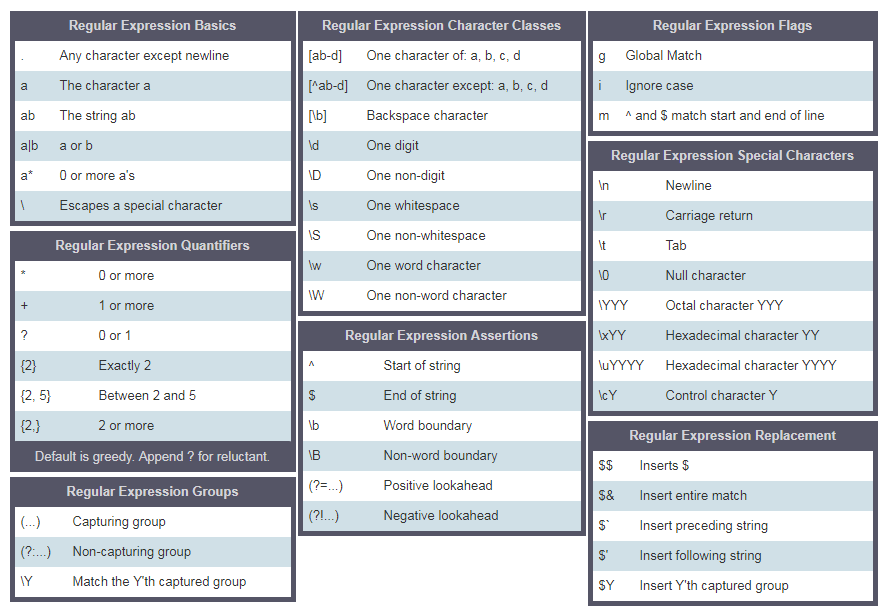

A **Reg**ular **Ex**pression or **RegEx** is a special text string that helps to find patterns in data. A RegEx can be used to check if some pattern exists in a different data type. To use RegEx in python first we should import the RegEx module which is called **`re`**.

### Python RegEx Methods

To find a pattern we use different set of **`re`** character sets that allows to search for a match in a string.

* **`re.findall`**: Returns a list containing all matches
* **`re.split`**:	Takes a string, splits it at the match points, returns a list
* **`re.sub`**:  Replaces one or many matches within a string
* **`re.search`**: Returns a match object if there is one anywhere in the string, including multiline strings.
* **`re.match()`**: searches only in the beginning of the first line of the string and returns matched objects if found, else returns **`None`**.

To use it, we need to import the module.

In [9]:
import re

The module defines several functions and constants to work with RegEx.

### 1. `re.findall()`

The **`re.findall()`** method returns a list of strings containing all matches.

In [3]:
# Example 1: re.findall()

# Program to extract numbers from a string

import re

string = 'hello 12 hi 89. Howdy 34'
pattern = '\d+'

result = re.findall(pattern, string)
print(result)

# Output: ['12', '89', '34']

['12', '89', '34']


If the pattern is not found, **`re.findall()`** returns an empty list.

In [4]:
# Example 2: re.findall()

txt = '''Python is the most beautiful language that a human being has ever created.
I recommend python for a first programming language'''

# It return a list
matches = re.findall('language', txt, re.I)
print(matches)  # ['language', 'language']

['language', 'language']


As you can see, the word **`language`** was found two times in the string. Let us practice some more.
Now we will look for both **`Python`** and **`python`** words in the string:

In [5]:
# Example 3: re.findall()

txt = '''Python is the most beautiful language that a human being has ever created.
I recommend python for a first programming language'''

# It returns list
matches = re.findall('python', txt, re.I)
print(matches)  # ['Python', 'python']

['Python', 'python']


Since we are using **`re.I`** both lowercase and uppercase letters are included. If we do not have the **`re.I`** flag, then we will have to write our pattern differently. Let us check it out:

In [6]:
# Example 4: re.findall()

txt = '''Python is the most beautiful language that a human being has ever created.
I recommend python for a first programming language'''

matches = re.findall('Python|python', txt)
print(matches)  # ['Python', 'python']

matches = re.findall('[Pp]ython', txt)
print(matches)  # ['Python', 'python']

['Python', 'python']
['Python', 'python']


### 2. `re.split()`

The **`re.split`** method splits the string where there is a match and returns a list of strings where the splits have occurred.

In [7]:
# Example 1: re.split()

txt = '''I am teacher and  I love teaching.
There is nothing as rewarding as educating and empowering people.
I found teaching more interesting than any other jobs.
Does this motivate you to be a teacher?'''
print(re.split('\n', txt)) # splitting using \n - end of line symbol

['I am teacher and  I love teaching.', 'There is nothing as rewarding as educating and empowering people.', 'I found teaching more interesting than any other jobs.', 'Does this motivate you to be a teacher?']


In [8]:
# Example 2: re.split()

import re

string = 'Twelve:12 Eighty nine:89.'
pattern = '\d+'

result = re.split(pattern, string)
print(result)

# Output: ['Twelve:', ' Eighty nine:', '.']

['Twelve:', ' Eighty nine:', '.']


If the pattern is not found, **`re.split`** returns a list containing the original string.

You can pass **`maxsplit`** argument to the **`re.split`** method. It's the maximum number of splits that will occur.

In [9]:
# Example 3: re.split()

import re

string = 'Twelve:12 Eighty nine:89 Nine:9.'
pattern = '\d+'

# maxsplit = 1
# split only at the first occurrence
result = re.split(pattern, string, 1)
print(result)

# Output: ['Twelve:', ' Eighty nine:89 Nine:9.']

['Twelve:', ' Eighty nine:89 Nine:9.']


By the way, the default value of **`maxsplit`** is 0; meaning all possible splits.

### 3. `re.sub()`

**Syntax:**

```python
re.sub(pattern, replace, string)
```

The method returns a string where matched occurrences are replaced with the content of **`replace`** variable.

In [10]:
# Example 1: re.sub()

# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.sub(pattern, replace, string)
print(new_string)

# Output: abc12de23f456

abc12de23f456


If the pattern is not found, **`re.sub()`** returns the original string.

You can pass **`count`** as a fourth parameter to the **`re.sub()`** method. If omited, it results to 0. This will replace all occurrences.

In [11]:
# Example 2: re.sub()

import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'
replace = ''

new_string = re.sub(r'\s+', replace, string, 1)
print(new_string)

# Output:
# abc12de 23
# f45 6

abc12de 23 
 f45 6


In [12]:
# Example 3: re.sub()

txt = '''Python is the most beautiful language that a human being has ever created.
I recommend python for a first programming language'''

match_replaced = re.sub('Python|python', 'JavaScript', txt, re.I)
print(match_replaced)  # JavaScript is the most beautiful language that a human being has ever created.
# OR
match_replaced = re.sub('[Pp]ython', 'JavaScript', txt, re.I)
print(match_replaced)  # JavaScript is the most beautiful language that a human being has ever created.


JavaScript is the most beautiful language that a human being has ever created.
I recommend JavaScript for a first programming language
JavaScript is the most beautiful language that a human being has ever created.
I recommend JavaScript for a first programming language


Let us add one more example. The following string is really hard to read unless we remove the **`%`** symbol. Replacing the **`%`** with an empty string will clean the text.

In [13]:
# Example 4: re.sub()

txt = '''%I a%m te%%a%%che%r% a%n%d %% I l%o%ve te%ach%ing.
T%he%re i%s n%o%th%ing as r%ewarding a%s e%duc%at%i%ng a%n%d e%m%p%ow%er%ing p%e%o%ple.
I fo%und te%a%ching m%ore i%n%t%er%%es%ting t%h%an any other %jobs.
D%o%es thi%s m%ot%iv%a%te %y%o%u to b%e a t%e%a%cher?'''

matches = re.sub('%', '', txt)
print(matches)

I am teacher and  I love teaching. 
There is nothing as rewarding as educating and empowering people.
I found teaching more interesting than any other jobs. 
Does this motivate you to be a teacher?


### 4. `re.subn()`

The **`re.subn()`** is similar to **`re.sub()`** expect it returns a tuple of 2 items containing the new string and the number of substitutions made.

In [14]:
# Example 1: re.subn()

# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.subn(pattern, replace, string)
print(new_string)

# Output: ('abc12de23f456', 4)

('abc12de23f456', 4)


### 5. `re.search()`

The **`re.search()`** method takes two arguments: a pattern and a string. The method looks for the first location where the RegEx pattern produces a match with the string.

If the search is successful, **`re.search()`** returns a match object; if not, it returns **`None`**.

```python
match = re.search(pattern, str)
```

In [15]:
# Example 1: re.search()

import re

string = "Python is fun"

# check if 'Python' is at the beginning
match = re.search('\APython', string)

if match:
    print("pattern found inside the string")
else:
    print("pattern not found")

# Output: pattern found inside the string

pattern found inside the string


Here, **`match`** contains a match object.

In [16]:
# Example 2: re.search()

import re

txt = '''Python is the most beautiful language that a human being has ever created.
I recommend python for a first programming language'''

# It returns an object with span and match
match = re.search('first', txt, re.I)
print(match)  # <re.Match object; span=(100, 105), match='first'>
# We can get the starting and ending position of the match as tuple using span
span = match.span()
print(span)     # (100, 105)
# Lets find the start and stop position from the span
start, end = span
print(start, end)  # 100 105
substring = txt[start:end]
print(substring)       # first

<re.Match object; span=(100, 105), match='first'>
(100, 105)
100 105
first


## Match object

You can get methods and attributes of a match object using dir() function.

Some of the commonly used methods and attributes of match objects are:

In [17]:
import re

txt = 'I love to teach python and javaScript'
# It returns an object with span, and match
match = re.match('I love to teach', txt, re.I)
print(match)  # <re.Match object; span=(0, 15), match='I love to teach'>
# We can get the starting and ending position of the match as tuple using span
span = match.span()
print(span)     # (0, 15)
# Lets find the start and stop position from the span
start, end = span
print(start, end)  # 0, 15
substring = txt[start:end]
print(substring)       # I love to teach

<re.Match object; span=(0, 15), match='I love to teach'>
(0, 15)
0 15
I love to teach


As you can see from the example above, the pattern we are looking for (or the substring we are looking for) is **`I love to teach`**. The match function returns an object **only** if the text starts with the pattern.

In [8]:
import re

txt = 'I love to teach python and javaScript'
match = re.match('I like to teach', txt, re.I)
print(match)  # None

None


The string does not string with **`I like to teach`**, therefore there was no match and the match method returned **`None`**.

### 1. `match.group()`

The **`group()`** method returns the part of the string where there is a match.

In [19]:
# Example 6: Match object

import re

string = '39801 356, 2102 1111'

# Three digit number followed by space followed by two digit number
pattern = '(\d{3}) (\d{2})'

# match variable contains a Match object.
match = re.search(pattern, string)

if match:
    print(match.group())
else:
    print("pattern not found")

# Output: 801 35

801 35


Here, match variable contains a match object.

Our pattern **`(\d{3}) (\d{2})`** has two subgroups **`(\d{3})`** and **`(\d{2})`**. You can get the part of the string of these parenthesized subgroups. Here's how:

In [20]:
match.group(1)

'801'

In [21]:
match.group(2)

'35'

In [22]:
match.group(1, 2)

('801', '35')

In [23]:
match.groups()

('801', '35')

### 2. `match.start(), match.end() and match.span()`

The **`start()`** function returns the index of the start of the matched substring. Similarly, **`end()`** returns the end index of the matched substring.

In [24]:
match.start()

2

In [25]:
match.end()

8

The **`span()`** function returns a tuple containing start and end index of the matched part.

In [26]:
match.span()

(2, 8)

### 3. `match.re and match.string`

The **`re`** attribute of a matched object returns a regular expression object. Similarly, **`string`** attribute returns the passed string.

In [27]:
match.re

re.compile(r'(\d{3}) (\d{2})', re.UNICODE)

In [28]:
match.string

'39801 356, 2102 1111'

## Using `r` prefix before RegEx

When **`r`** or **`R`** prefix is used before a regular expression, it means raw string. For example, **`'\n'`** is a new line whereas **`r'\n'`** means two characters: a backslash **`\`** followed by **`n`**.

Backlash **`\`** is used to escape various characters including all metacharacters. However, using **`r`** prefix makes **`\`** treat as a normal character.

In [3]:
# Example 7: Raw string using r prefix

import re

string = '\n and \r are escape sequences.'

result = re.findall(r'[\n\r]', string)
print(result)

# Output: ['\n', '\r']

['\n', '\r']


## Example of RegEx with Metacharacters

Let us use examples to clarify the meta characters with RegEx methods:

### Square Brackets `[]`

Let us use square bracket to include lower and upper case

In [30]:
# Example 1:

regex_pattern = r'[Aa]pple' # this square bracket mean either A or a
txt = 'Apple and banana are fruits. An old cliche says an apple a day a doctor way has been replaced by a banana a day keeps the doctor far far away.'
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Apple', 'apple']

['Apple', 'apple']


If we want to look for the both apple and banana, we write the pattern as follows:

In [31]:
# Example 2:

regex_pattern = r'[Aa]pple|[Bb]anana' # this square bracket means either A or a
txt = 'Apple and banana are fruits. An old cliche says an apple a day a doctor way has been replaced by a banana a day keeps the doctor far far away.'
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Apple', 'banana', 'apple', 'banana']

['Apple', 'banana', 'apple', 'banana']


Using the square brackets **`[]`** and or operator **`|`** , we manage to extract Apple, apple, Banana

### Escape character `\`

In [32]:
# Example 1:

regex_pattern = r'\d'  # d is a special character which means digits
txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
matches = re.findall(regex_pattern, txt)
print(matches)  # ['8', '1', '9', '4', '2', '1', '4', '2', '0', '1', '8', '7', '6'] - this is not what we want

['8', '1', '9', '4', '2', '1', '4', '2', '0', '1', '8', '7', '6']


### One or more times `+`

In [33]:
# Example 1:

regex_pattern = r'\d+'  # d is a special character which means digits, + mean one or more times
txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
matches = re.findall(regex_pattern, txt)
print(matches)  # ['8', '1942', '14', '2018', '76'] - this is better!

['8', '1942', '14', '2018', '76']


### Period `.`

In [34]:
# Example 1:

regex_pattern = r'[a].'  # this square bracket means a and . means any character except new line
txt = '''Apple and Banana are fruits'''
matches = re.findall(regex_pattern, txt)
print(matches)  # ['an', 'an', 'an', 'a ', 'ar']

['an', 'an', 'an', 'a ', 'ar']


In [35]:
# Example 2: [] with +

regex_pattern = r'[a].+'  # . any character, + any character one or more times
matches = re.findall(regex_pattern, txt)
print(matches)  # ['and Banana are fruits']

['and Banana are fruits']


### Zero or more times `*`

In [36]:
# Example 1:

regex_pattern = r'[a].*'  # . any character, * any character zero or more times
txt = '''Apple and Banana are fruits'''
matches = re.findall(regex_pattern, txt)
print(matches)  # ['and Banana are fruits']

['and Banana are fruits']


### Zero or one time `?`

Zero or one time. The pattern may not occur or it may occur once.

In [37]:
# Example 1:

txt = '''I am not sure if there is a convention how to write the word e-mail.
Some people write it as email others may write it as Email or E-mail.'''
regex_pattern = r'[Ee]-?mail'  # ? means here that '-' is optional
matches = re.findall(regex_pattern, txt)
print(matches)  # ['e-mail', 'email', 'Email', 'E-mail']

['e-mail', 'email', 'Email', 'E-mail']


### Quantifier `{}`

We can specify the length of the substring we are looking for in a text, using a curly brackets **`{}`**. Let us imagine, we are interested in a substring with a length of 4 characters:

In [38]:
# Example 1:

txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
regex_pattern = r'\d{4}'  # exactly four times
matches = re.findall(regex_pattern, txt)
print(matches)  # ['1942', '2018']

['1942', '2018']


In [39]:
# Example 2:

txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
regex_pattern = r'\d{1,4}'   # 1 to 4
matches = re.findall(regex_pattern, txt)
print(matches)  # ['8', '1942', '76', '14', '2018', '76']

['8', '1942', '14', '2018', '76']


### Cart `^`

In [40]:
# Example 1: Starts with

txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
regex_pattern = r'^Hawking'  # ^ means starts with
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Hawking']

['Hawking']


In [41]:
# Example 2: Negation

txt = "Hawking born on 8 January 1942 and died on 14 March 2018 Einstein's birth anniversary (Pi-Day) and both died at 76"
regex_pattern = r'[^A-Za-z ]+'  # ^ in set character means negation, not A to Z, not a to z, no space
matches = re.findall(regex_pattern, txt)
print(matches)  # ['8', '1942', '14', '2018', "'", '(', '-', ')', '76']

['8', '1942', '14', '2018', "'", '(', '-', ')', '76']


# Exercises:



## Exercise 1

 1. What is the most frequent word in the following paragraph?
    - ```py
paragraph = 'I love teaching. If you do not love teaching what else can you love. I love Python if you do not love something which can give you all the capabilities to develop an application what else can you love.
    ```

   - ```sy
    [
    (6, 'love'),
    (5, 'you'),
    (3, 'can'),
    (2, 'what'),
    (2, 'teaching'),
    (2, 'not'),
    (2, 'else'),
    (2, 'do'),
    (2, 'I'),
    (1, 'which'),
    (1, 'to'),
    (1, 'the'),
    (1, 'something'),
    (1, 'if'),
    (1, 'give'),
    (1, 'develop'),
    (1, 'capabilities'),
    (1, 'application'),
    (1, 'an'),
    (1, 'all'),
    (1, 'Python'),
    (1, 'If')
    ]
    ```

2. The position of some particles on the horizontal x-axis are -12, -4, -3 and -1 in the negative direction, 0 at origin, 4 and 8 in the positive direction. Extract these numbers from this whole text and find the distance between the two furthest particles.

    - ```py
points = ['-1', '2', '-4', '-3', '-1', '0', '4', '8']
sorted_points =  [-4, -3, -1, -1, 0, 2, 4, 8]
distance = 8 -(-4) # 12
    ```

In [128]:
text = "I love teaching. If you do not love teaching what else can you love. I love Python if you do not love something which can give you all the capabilities to develop an application what else can you love."
text = re.sub(r"\.","",text)
listOfWords = re.split(" ",text)
for i in range(len(listOfWords)):
    listOfWords[i] = listOfWords[i].lower()
listOfWords.sort()
new_list = {}
counter = 1
for j in range(len(listOfWords)):
    if(j!=len(listOfWords)-1):
        if(listOfWords[j]==listOfWords[j+1]):
            counter+=1
        else:
            new_list[listOfWords[j]] = counter
            counter = 1
    else:
            new_list[listOfWords[j]] = counter
            counter = 1
sorted_new_list = sorted(new_list.items(), key=lambda x:x[1],reverse=True)
print(sorted_new_list)

[('love', 6), ('you', 5), ('can', 3), ('do', 2), ('else', 2), ('i', 2), ('if', 2), ('not', 2), ('teaching', 2), ('what', 2), ('all', 1), ('an', 1), ('application', 1), ('capabilities', 1), ('develop', 1), ('give', 1), ('python', 1), ('something', 1), ('the', 1), ('to', 1), ('which', 1)]


## Exercise 2


1. Write a pattern which identifies if a string is a valid python variable

    - ```py
    is_valid_variable('first_name')  # True
    is_valid_variable('first-name')  # False
    is_valid_variable('1first_name') # False
    is_valid_variable('firstname')   # True
    ```

In [1]:
pattern = "^[a-zA-Z_][0-9A-Za-z_]*[0-9a-zA-Z_]*$"
txt = "_Ali236_H_"
result = re.search(pattern,txt)
if(result):
    print("valid")
else:
    print("not valid")

NameError: name 're' is not defined

## Exercise 3



1. Clean the following text. After cleaning, count three most frequent words in the string.

    - ```py
    sentence = '''%I $am@% a %tea@cher%, &and& I lo%#ve %tea@ching%;. There $is nothing; &as& mo@re rewarding as educa@ting &and& @emp%o@wering peo@ple. ;I found tea@ching m%o@re interesting tha@n any other %jo@bs. %Do@es thi%s mo@tivate yo@u to be a tea@cher!?'''

    print(clean_text(sentence)):
   output: "I am a teacher and I love teaching There is nothing as more rewarding as educating and empowering people I found teaching more interesting than any other jobs Does this motivate you to be a teacher"
    
    print(most_frequent_words(cleaned_text)):
    output: "[(3, 'I'), (2, 'teaching'), (2, 'teacher')]"
    ```

In [140]:
# print 'clean text'
import re
def clean_text(text):
    pattern = "[^A-Za-z0-9 ]"
    cleanText = re.sub(pattern,"",text)
    return cleanText
text = '''%I $am@% a %tea@cher%, &and& I lo%#ve %tea@ching%;. There $is nothing; &as& mo@re rewarding as educa@ting &and& @emp%o@wering peo@ple. ;I found tea@ching m%o@re interesting tha@n any other %jo@bs. %Do@es thi%s mo@tivate yo@u to be a tea@cher!?'''
cleanText = clean_text(text)
print(cleanText)


print()
print()
print()


# print 'most frequent words'
cleanText = re.split(" ",cleanText)
for i in range(len(cleanText)):
    cleanText[i] = cleanText[i].lower()
cleanText.sort()
new_list = {}
counter = 1
for j in range(len(cleanText)):
    if(j!=len(cleanText)-1):
        if(cleanText[j]==cleanText[j+1]):
            counter+=1
        else:
            new_list[cleanText[j]] = counter
            counter = 1
    else:
            new_list[cleanText[j]] = counter
            counter = 1
sorted_new_list = sorted(new_list.items(), key=lambda x:x[1],reverse=True)
print(sorted_new_list)


I am a teacher and I love teaching There is nothing as more rewarding as educating and empowering people I found teaching more interesting than any other jobs Does this motivate you to be a teacher



[('i', 3), ('a', 2), ('and', 2), ('as', 2), ('more', 2), ('teacher', 2), ('teaching', 2), ('am', 1), ('any', 1), ('be', 1), ('does', 1), ('educating', 1), ('empowering', 1), ('found', 1), ('interesting', 1), ('is', 1), ('jobs', 1), ('love', 1), ('motivate', 1), ('nothing', 1), ('other', 1), ('people', 1), ('rewarding', 1), ('than', 1), ('there', 1), ('this', 1), ('to', 1), ('you', 1)]
